## Analitika kitabxanalarının yüklənməsi

#### İstifadə olunacaq numpy, pandas, matplotlib və seaborn kitabxanalarını gətirin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datasetin Yüklənməsi

#### Dataseti yükləyin

In [2]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Python\Netflix\netflix daily top 10.csv")

## Dataset Məlumatları

#### Datasetlə tanış olun və ilk 10 dəyərinə göz gəzdirin

In [3]:
df.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


#### Dataset haqqında məlumat əldə edə biləcəyiniz kodları yazın. Dataset neçə sətrdən ibarətdir, hansı sütunları var, sütunların tipləri nələrdir?

In [27]:
print('sütunlar: ',list(df.columns))
print('sətir sayı=',df['Rank'].count())
print(df.info())

sütunlar:  ['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type', 'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10', 'Viewership Score']
sətir sayı= 7100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     7100 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: date

## Data Wrangling

#### Datanın sütunları ilə tanış olun. Onlar hansı data tiplərindədir? Bütün sütunların data tipləri uyğundur?

In [28]:
df.info()
#tarix tipleri yanlisdi object idi datetime-a çevirdim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB


#### Düzgün data tipində olmayan müvafiq data tiplərinə keçirin

In [3]:
df['As of']=pd.to_datetime(df['As of'],errors='coerce')
df['Netflix Release Date']=pd.to_datetime(df['Netflix Release Date'],errors='coerce')

#### Hansı sütunlarda boş sətrlər var? Hansı sütunlarda neçə boş sətr var?

In [11]:
df['Netflix Exclusive'].isnull().sum()

np.int64(0)

#### Boş sətrlər olan sütunda olan bütün boş məlumatları "No" yazısı ilə doldurun

In [4]:
df.fillna(value='No',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     7100 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB


## Analysis

#### Datada film tiplərinə görə paylanmanı göstərmək üçün pie chart-dan istifadə edin

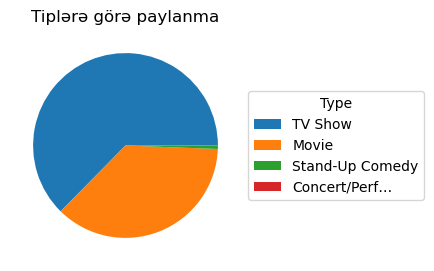

In [14]:
plt.figure(figsize=(5,3))
plt.pie(df['Type'].value_counts())
plt.legend(
    df['Type'].value_counts().index,
    title="Type",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)
plt.title('Tiplərə görə paylanma')
plt.show()


#### Ən çox hansı filmlər ilk 10 film arasına girib?

In [5]:
film=df[df['Type']=='Movie']
print(list(film.groupby('Title')['Days In Top 10'].sum().sort_values().tail(10).reset_index()['Title']))
plt.show()

['Red Notice', 'We Can Be Heroes', 'The Christmas Chronicles 2', 'Illumination Presents The G…', 'Donâ\x80\x99t Look Up', 'Despicable Me 2', '365 Days', 'How the Grinch Stole Christmas', 'Vivo', 'The Mitchells vs. The Machines']


#### İstifadəçi reytinqlərinə görə ən yüksək 10 film hansıdır? Nəticəni vizuallaşdırın

Text(0, 0.5, 'Viewership Score')

C:\Users\HP\New folder\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\HP\New folder\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\HP\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


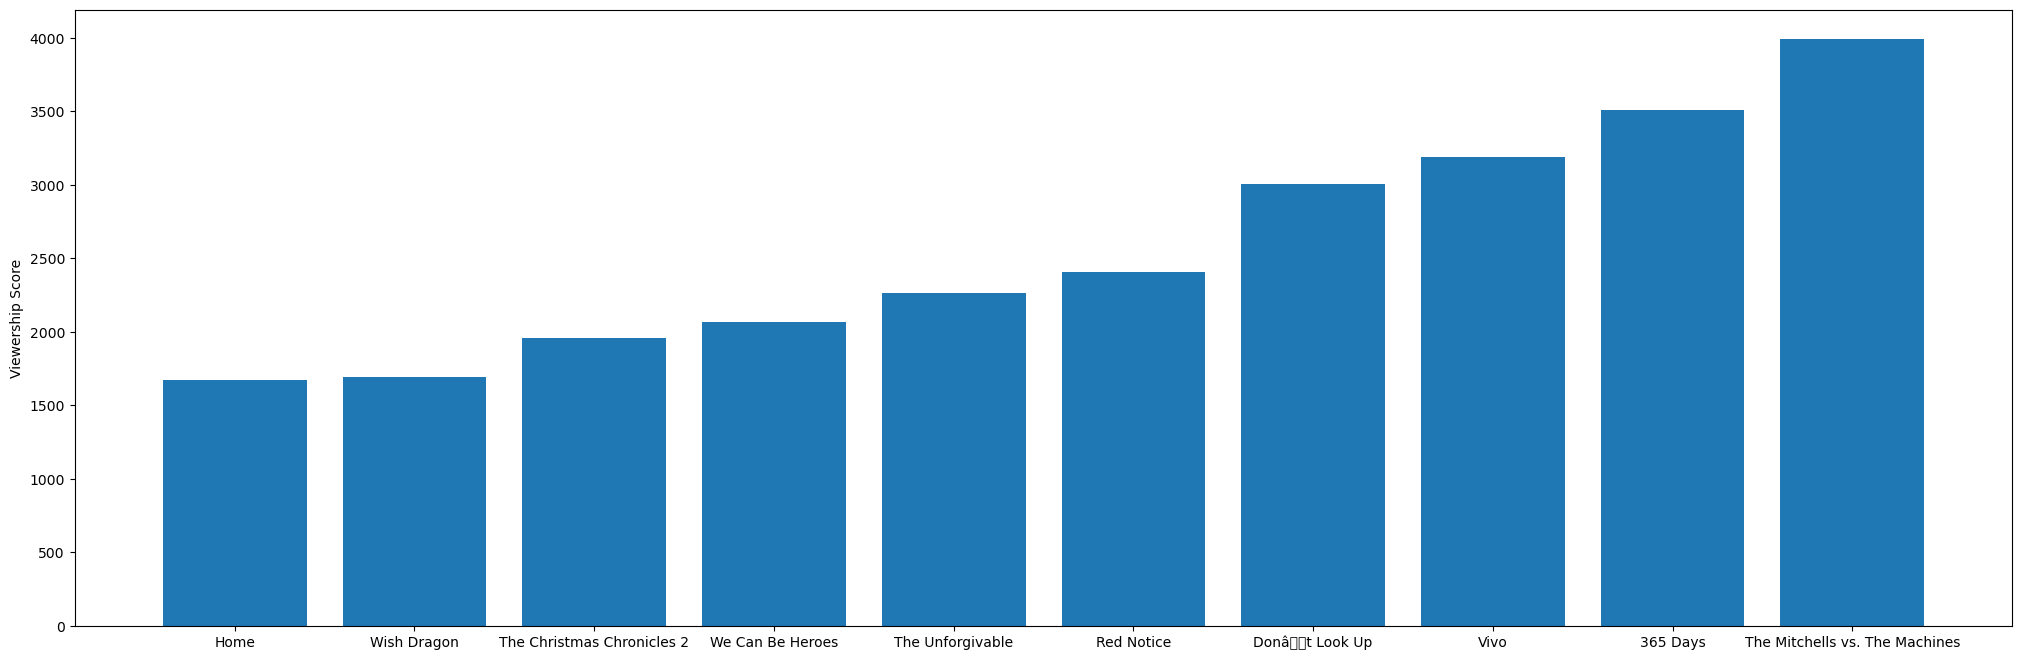

In [6]:
reytinq=film.groupby('Title')['Viewership Score'].sum().sort_values().tail(10).reset_index()
plt.figure(figsize=(25,8))
plt.bar(reytinq['Title'],reytinq['Viewership Score'])
plt.ylabel('Viewership Score')

#### Ən çox birinci yerdə qalan filmi öyrənmək istəyirəm

In [12]:
birinci_yer=film[film['Rank']==1].groupby('Title')['Rank'].count().sort_values().tail(1).reset_index()
title = birinci_yer.loc[0, 'Title']
rank  = birinci_yer.loc[0, 'Rank']

print(f"Film: {title}, 1-ci yerdə qalma sayı: {rank}")


Film: Red Notice, 1-ci yerdə qalma sayı: 9


#### Neçə fərqli gün üçün aparılıb bu ölçümlər? Yəni neçə fərqli gün üçün top 10 film göstərilib?

In [80]:
print('Gün sayı: ',film['As of'].nunique())

Gün sayı:  707


#### Netflix Exclusive filmlər daha yüksək reytinqə sahibdir, yoxsa digərləri?

In [13]:
muqayise=film.groupby('Netflix Exclusive')['Rank'].sum().reset_index()
Netflix_Exclusive_filmləri=muqayise.loc[1, 'Rank']
Digerleri=muqayise.loc[0, 'Rank']
if muqayise.loc[1, 'Rank']>muqayise.loc[0, 'Rank']:
    yuksek='Netflix_Exclusive'
else:
    yuksek='digerleri'
print(f"En yuksek reytinq:{yuksek}")

En yuksek reytinq:digerleri


#### Mən Movie-lər üçün aylıq trendi görmək istəyirəm.

In [14]:
film['Ay'] = film['Netflix Release Date'].dt.strftime('%b')

C:\Users\HP\AppData\Local\Temp\ipykernel_11148\945041432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film['Ay'] = film['Netflix Release Date'].dt.strftime('%b')


#### Aylara görə ən məşhur Filmlər hansı olub?

In [15]:
ayliq_populyar = film.loc[film.groupby('Ay')['Rank'].idxmin(),['Ay', 'Title']]
print(ayliq_populyar.to_string(index=False))

 Ay                        Title
Apr                Despicable Me
Aug             The Lost Husband
Dec                          Ava
Feb To All the Boys Always and …
Jan             Outside the Wire
Jul                     365 Days
Jun                  Da 5 Bloods
Mar                      Yes Day
May              The Wrong Missy
Nov              Hillbilly Elegy
Oct              Hubie Halloween
Sep       The Devil All the Time


#### 1/2/3/4 rübdə ən yüksək izləyici reytinqi olan 5 film hansı olub?

In [17]:
film['rüb']=film['Ay'].apply(func1)

C:\Users\HP\AppData\Local\Temp\ipykernel_11148\2956450824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film['rüb']=film['Ay'].apply(func1)


In [16]:
def func1(x):
    if x=='Jan' or x=='Feb' or x=='Mar':
        return 1
    elif x=='Apr' or x=='May' or x=='Jun':
        return 2
    elif x=='Jul' or x=='Aug' or x=='Sep':
        return 3
    else:
        return 4
        
        

,rüb,Title
3612,1,Yes Day
4258,2,The Mitchells vs. The Machines
959,3,365 Days
6589,4,Donât Look Up


C:\Users\HP\New folder\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\HP\New folder\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\HP\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


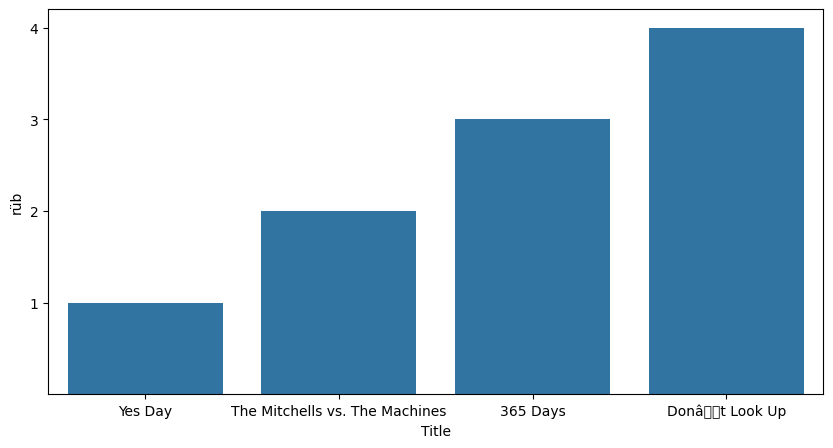

In [18]:
plt.figure(figsize=(10,5))
rüblük_reytinq = film.loc[film.groupby('rüb')['Viewership Score'].idxmax(),['rüb', 'Title']].sort_values('rüb')
plt.yticks(rüblük_reytinq['rüb'], [int(a) for a in rüblük_reytinq['rüb']])
sns.barplot(x='Title',y='rüb',data=rüblük_reytinq)
rüblük_reytinq

#### Yeni bir dashboard yaradın (15,15 ölçüsündə). Ən önəmli gördüyünüz 4 ədəd vizualı bu dashboard-da göstərin

C:\Users\HP\AppData\Local\Temp\ipykernel_11148\451691615.py:63: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_11148\451691615.py:63: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


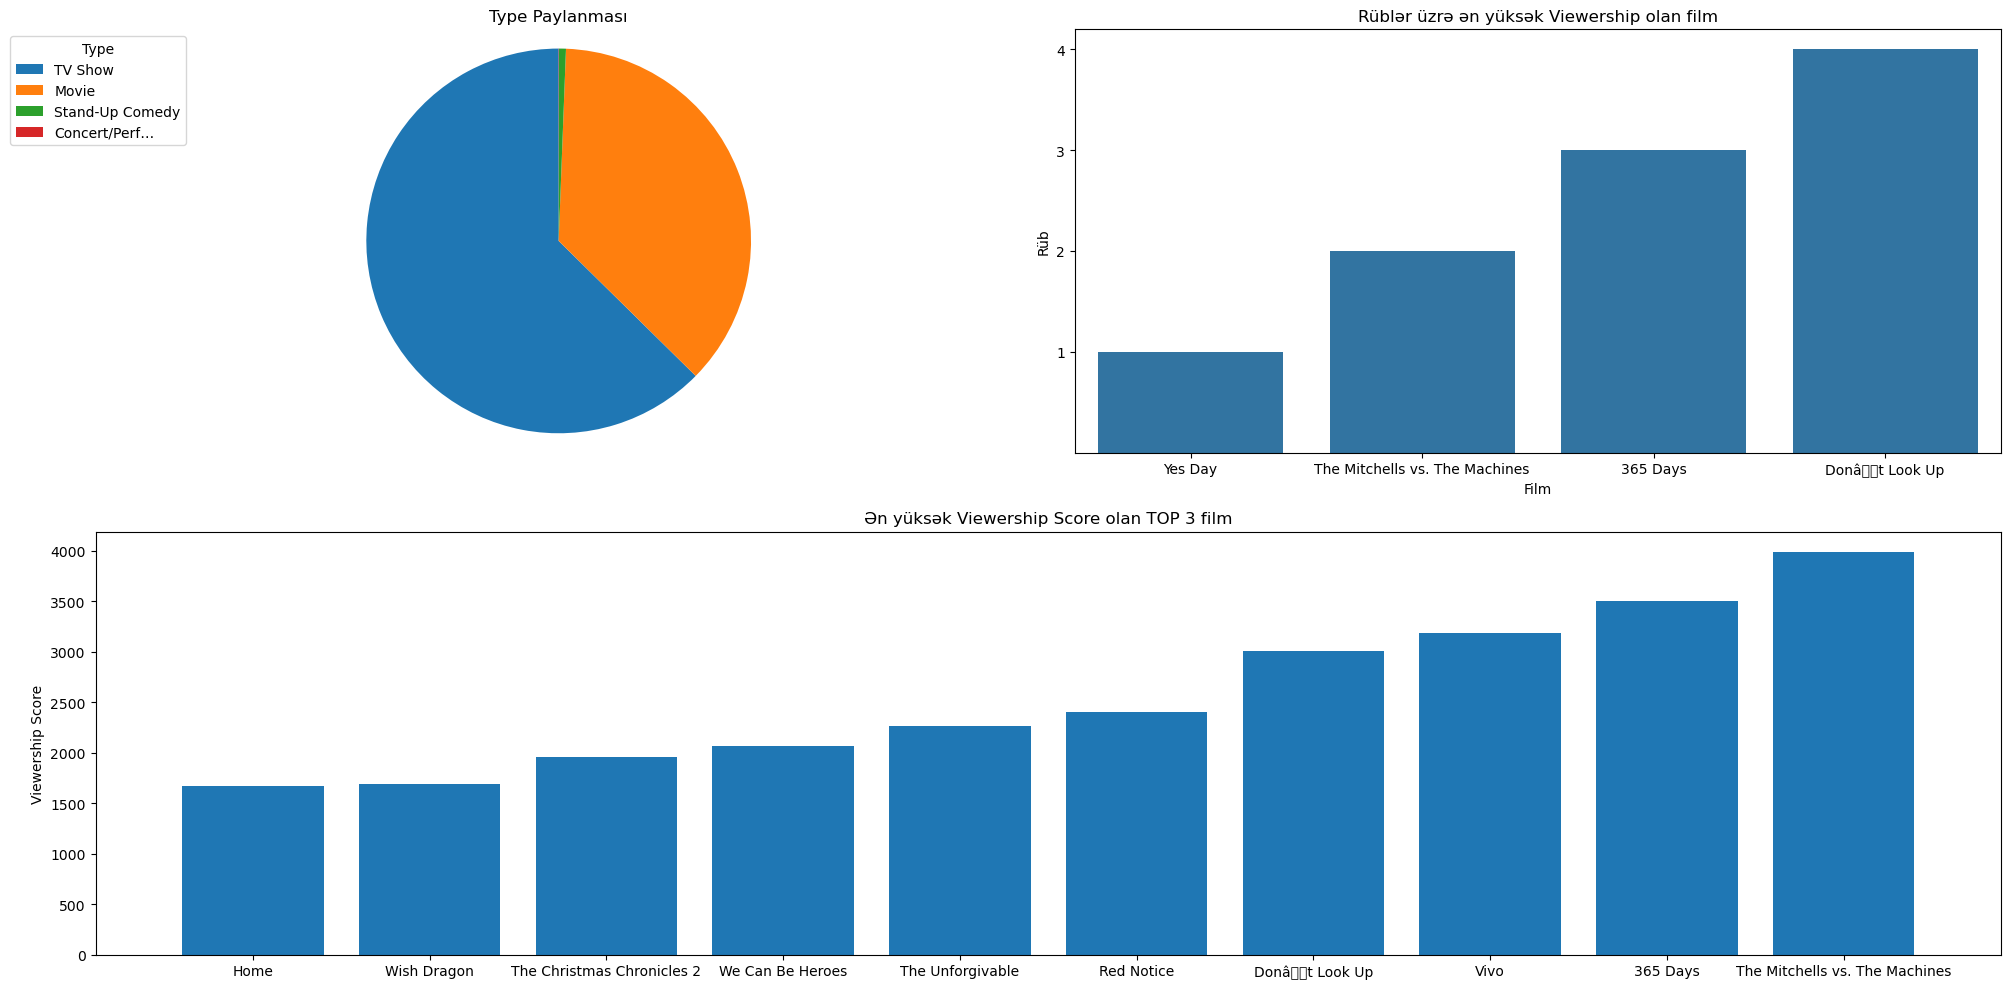

In [22]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2, 2)

# =======================
# 1️⃣ YUXARI SOL — PIE
# =======================
ax1 = fig.add_subplot(gs[0, 0])

sizes = df['Type'].value_counts()
labels = sizes.index

ax1.pie(
    sizes,
    labels=None,      # pie üzərində label yoxdur
    startangle=90
)

ax1.legend(
    labels,
    title="Type",
    loc='upper left',
    bbox_to_anchor=(-0.1, 1)
)

ax1.axis('equal')
ax1.set_title("Type Paylanması")

# =======================
# 2️⃣ YUXARI SAĞ — BAR (rüb üzrə top film)
# =======================
ax2 = fig.add_subplot(gs[0, 1])

rüblük_reytinq = film.loc[
    film.groupby('rüb')['Viewership Score'].idxmax(),
    ['rüb', 'Title']
].sort_values('rüb')

sns.barplot(x='Title', y='rüb', data=rüblük_reytinq, ax=ax2)

ax2.set_yticks(rüblük_reytinq['rüb'])
ax2.set_yticklabels([int(a) for a in rüblük_reytinq['rüb']])
ax2.set_title("Rüblər üzrə ən yüksək Viewership olan film")
ax2.set_xlabel("Film")
ax2.set_ylabel("Rüb")

# =======================
# 3️⃣ AŞAĞI — BAR (tam en)
# =======================
ax3 = fig.add_subplot(gs[1, :])

reytinq = film.groupby('Title')['Viewership Score'] \
              .sum().sort_values().tail(10).reset_index()

ax3.bar(reytinq['Title'], reytinq['Viewership Score'])
ax3.set_ylabel('Viewership Score')
ax3.set_title("Ən yüksək Viewership Score olan TOP 3 film")

# =======================
plt.tight_layout()
plt.show()
